<a href="https://colab.research.google.com/github/Roy-Develops/Gender-and-Age-prediction-AI-Model/blob/main/Project2_grayscale_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm # provides a progress bar for iterables
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/Colab Notebooks/archive (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
BASE_DIR = '/content/UTKFace'
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/UTKFace/19_0_0_20170103201333351.jpg....,19,0
1,/content/UTKFace/2_1_3_20161220144846231.jpg.c...,2,1
2,/content/UTKFace/21_1_4_20170103223240255.jpg....,21,1
3,/content/UTKFace/84_0_0_20170111211153326.jpg....,84,0
4,/content/UTKFace/2_1_3_20161219230137680.jpg.c...,2,1


In [ ]:
gender_dict = {0:'Male', 1:'Female'}

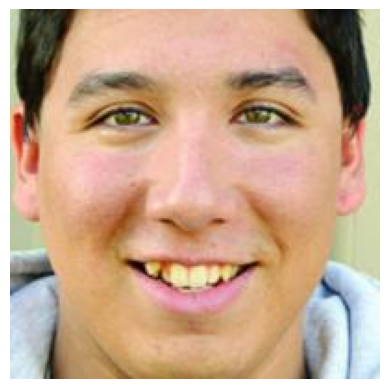

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

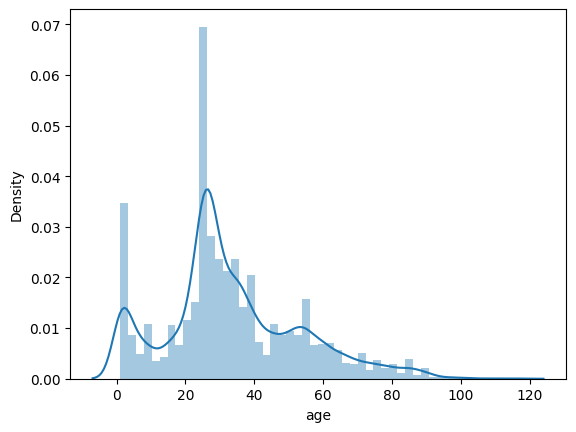

In [ ]:
sns.distplot(df['age'])

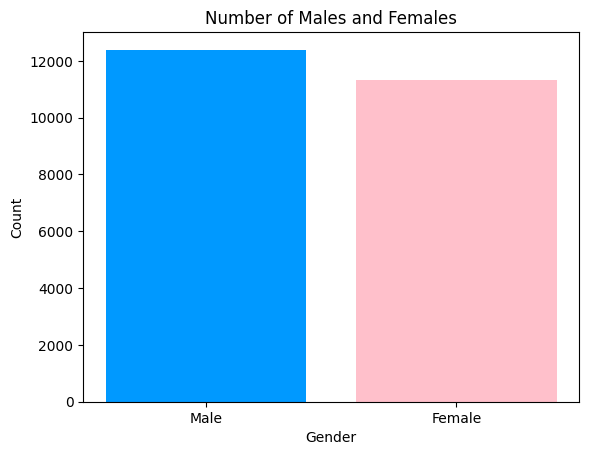

In [ ]:
male_count = df[df['gender'] == 0].shape[0]
female_count = df[df['gender'] == 1].shape[0]

# Plotting the counts
plt.bar(["Male", "Female"], [male_count, female_count],color=['#0099FF','pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Males and Females")
plt.show()

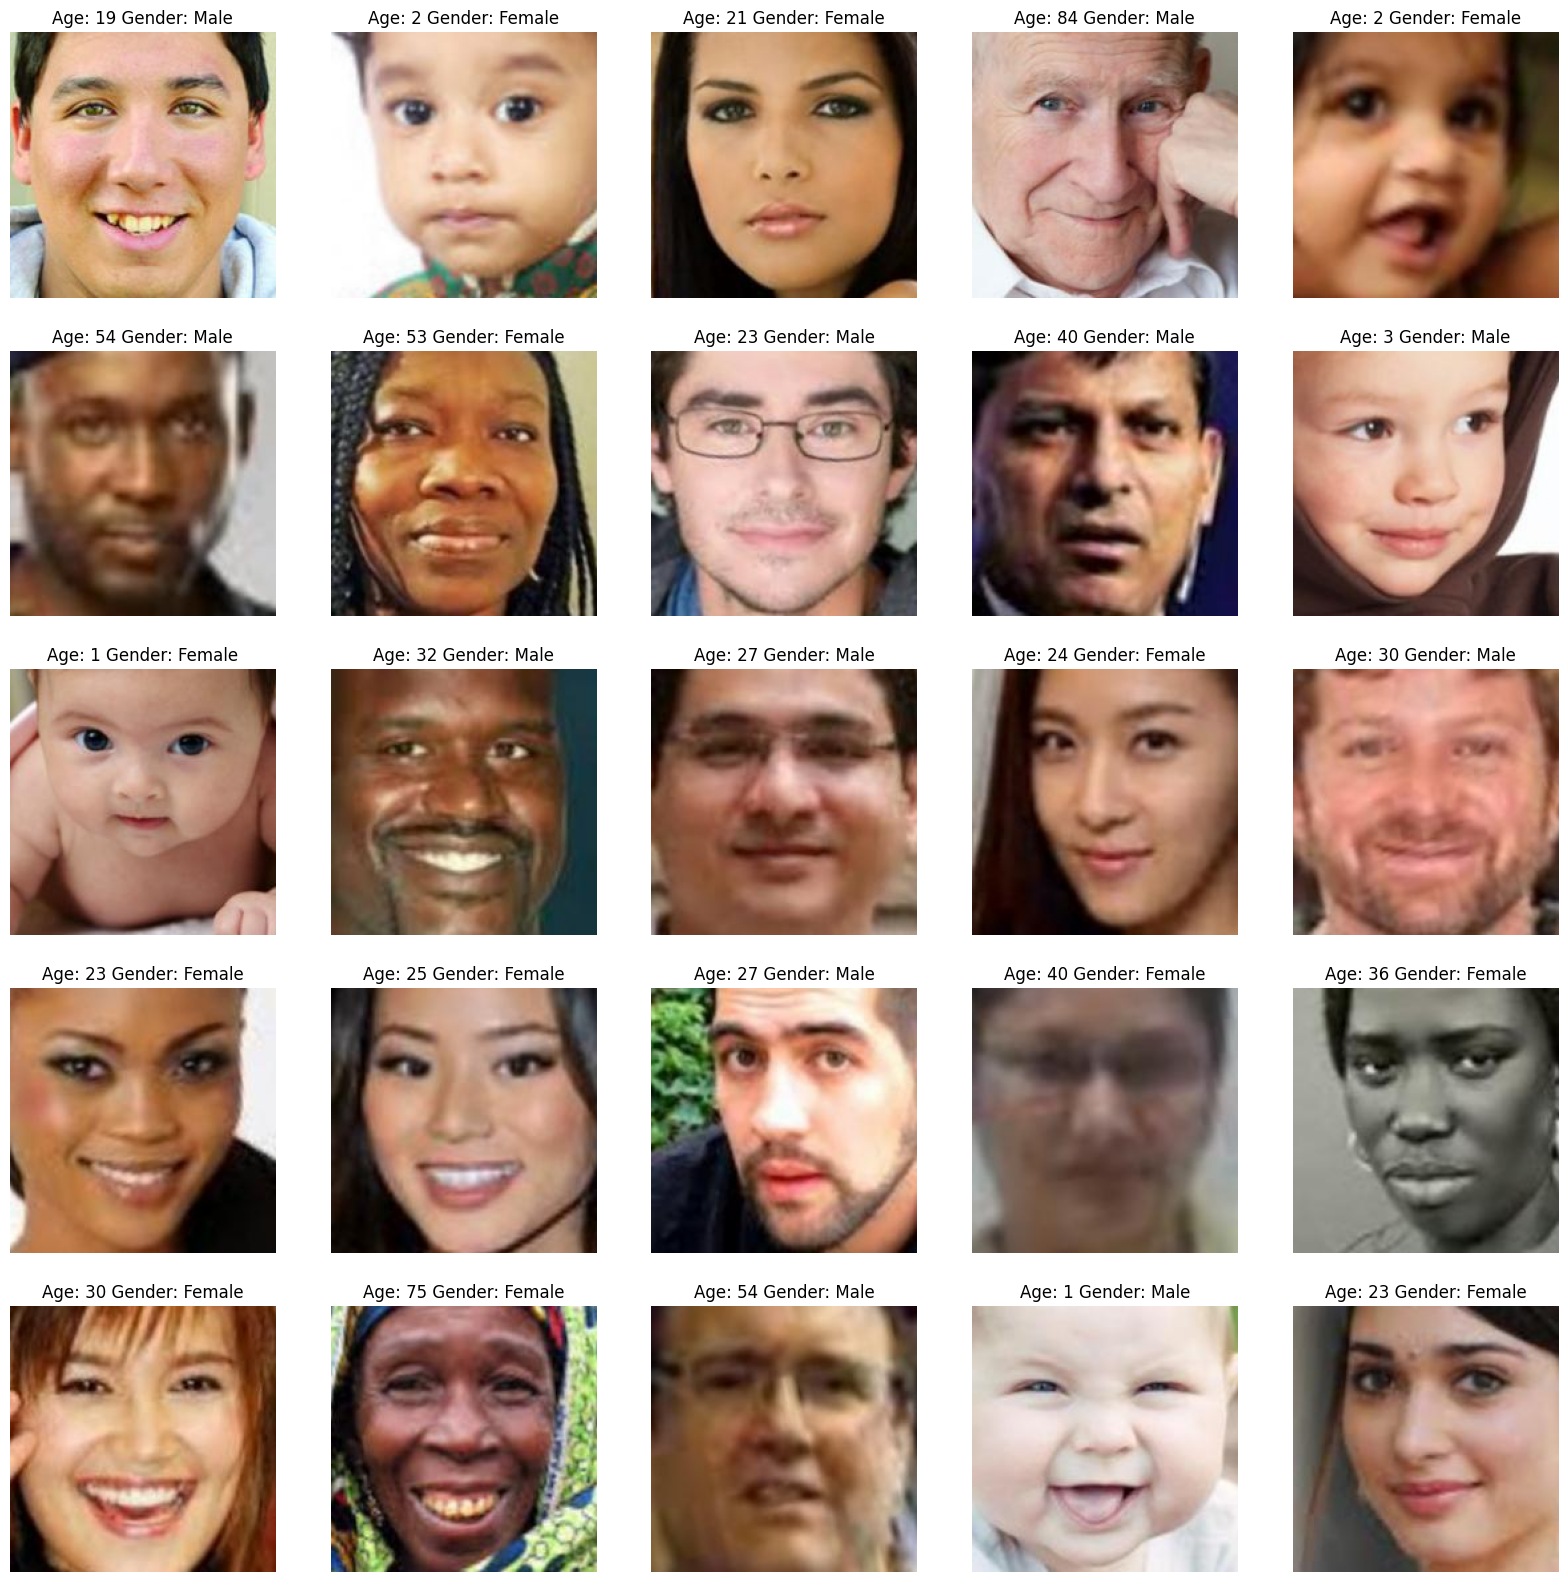

In [ ]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df['image'])


  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
X = X/255.0
print(X)

[[[[0.80392157]
   [0.79215686]
   [0.75686275]
   ...
   [0.84313725]
   [0.83921569]
   [0.83137255]]

  [[0.8       ]
   [0.77647059]
   [0.75294118]
   ...
   [0.84705882]
   [0.85098039]
   [0.84705882]]

  [[0.79215686]
   [0.78823529]
   [0.78039216]
   ...
   [0.85098039]
   [0.84705882]
   [0.83921569]]

  ...

  [[0.88235294]
   [0.88627451]
   [0.87058824]
   ...
   [0.8       ]
   [0.8       ]
   [0.83137255]]

  [[0.85882353]
   [0.87058824]
   [0.88235294]
   ...
   [0.80392157]
   [0.83921569]
   [0.87843137]]

  [[0.85882353]
   [0.87058824]
   [0.90588235]
   ...
   [0.82352941]
   [0.88627451]
   [0.91764706]]]


 [[[0.83137255]
   [0.68235294]
   [0.55294118]
   ...
   [0.45490196]
   [0.43529412]
   [0.42352941]]

  [[0.9254902 ]
   [0.81176471]
   [0.68627451]
   ...
   [0.4745098 ]
   [0.45882353]
   [0.44705882]]

  [[0.98431373]
   [0.93333333]
   [0.8627451 ]
   ...
   [0.49019608]
   [0.47843137]
   [0.47058824]]

  ...

  [[0.99215686]
   [0.99607843]
   [0.9

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)
print(X.shape)
print(y_gender.shape)
print(y_age.shape)

(23708, 128, 128, 1)
(23708,)
(23708,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(X, y_gender, y_age, test_size=0.2, random_state=101)


In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
"""
These layers extract features from the input image:
Conv2D(32, kernel_size=(3, 3), activation='relu'): This creates a convolutional layer with 32 filters of size 3x3. It applies a ReLU activation function to the output. Convolution helps identify patterns in the image.
MaxPooling2D(pool_size=(2, 2)): This performs max pooling, reducing the dimensionality of the feature maps by taking the maximum value from a 2x2 window. It helps capture dominant features and reduces computational cost.
The code repeats this pattern (convolution followed by max pooling) three more times, progressively increasing the number of filters (64, 128, 256) to extract more complex features.
"""
flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.4) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

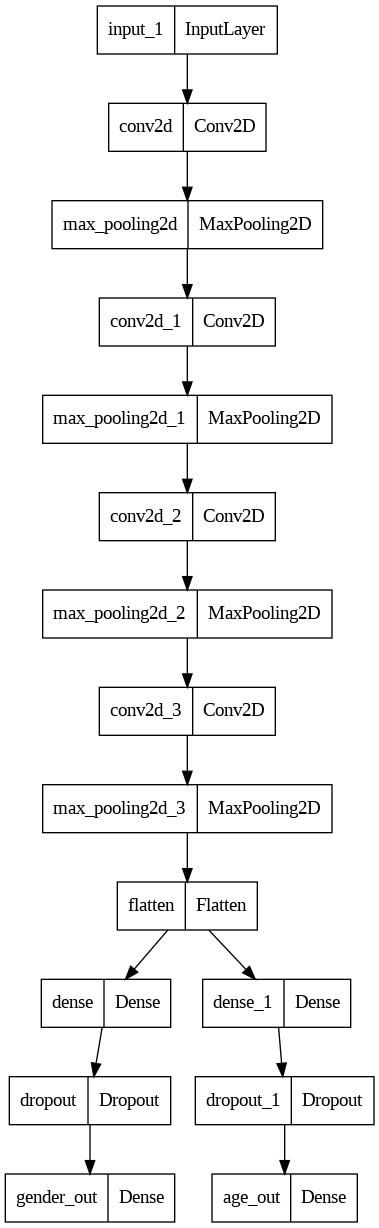

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(x=X_train, y=[y_gender_train, y_age_train], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
475/475 [==============================] - 23s 28ms/step - loss: 15.6906 - gender_out_loss: 0.6836 - age_out_loss: 15.0070 - gender_out_accuracy: 0.5615 - gender_out_mae: 0.4707 - age_out_accuracy: 0.0456 - age_out_mae: 15.0070 - val_loss: 13.4554 - val_gender_out_loss: 0.5599 - val_age_out_loss: 12.8955 - val_gender_out_accuracy: 0.7483 - val_gender_out_mae: 0.4086 - val_age_out_accuracy: 0.0440 - val_age_out_mae: 12.8955
Epoch 2/30
475/475 [==============================] - 10s 21ms/step - loss: 11.7271 - gender_out_loss: 0.5073 - age_out_loss: 11.2199 - gender_out_accuracy: 0.7536 - gender_out_mae: 0.3408 - age_out_accuracy: 0.0321 - age_out_mae: 11.2199 - val_loss: 12.3409 - val_gender_out_loss: 0.4498 - val_age_out_loss: 11.8911 - val_gender_out_accuracy: 0.7899 - val_gender_out_mae: 0.3134 - val_age_out_accuracy: 0.0108 - val_age_out_mae: 11.8911
Epoch 3/30
475/475 [==============================] - 10s 22ms/step - loss: 10.4063 - gender_out_loss: 0.4407 - age_out_loss

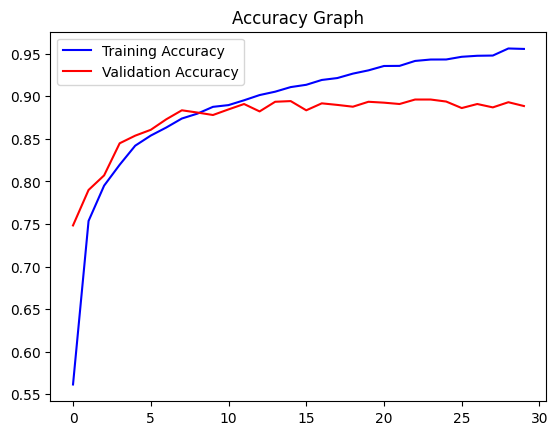

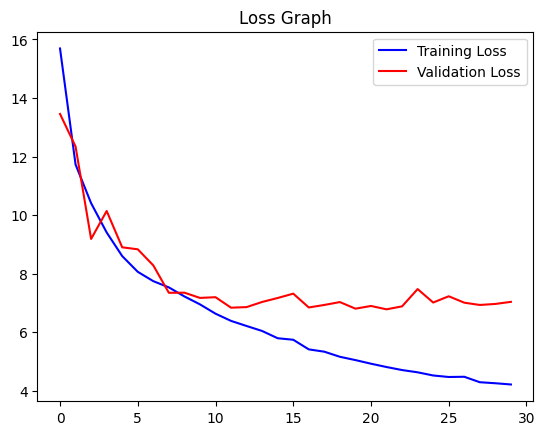

In [ ]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 66
1/1 [==============================] - 0s 448ms/step
Predicted Gender: Female Predicted Age: 65


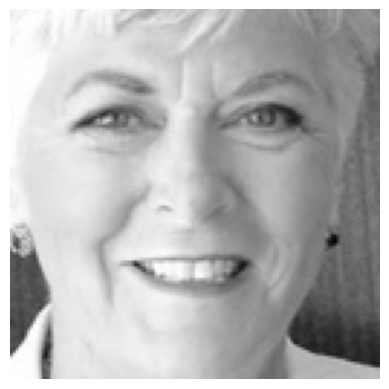

In [ ]:
image_index = 100
print("Original Gender:", gender_dict[y_gender_test[image_index]], "Original Age:", y_age_test[image_index])
# predict from model
pred = model.predict(X_test[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X_test[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 1
1/1 [==============================] - 0s 32ms/step
Predicted Gender: Male Predicted Age: 2


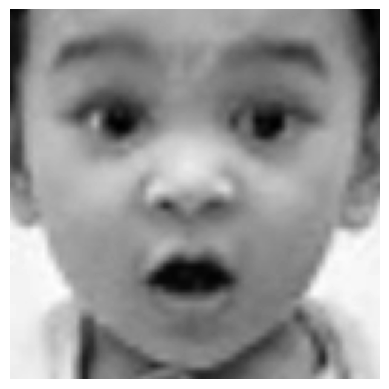

In [ ]:
image_index = 2000
print("Original Gender:", gender_dict[y_gender_test[image_index]], "Original Age:", y_age_test[image_index])
# predict from model
pred = model.predict(X_test[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X_test[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 31
1/1 [==============================] - 0s 81ms/step
Predicted Gender: Female Predicted Age: 32


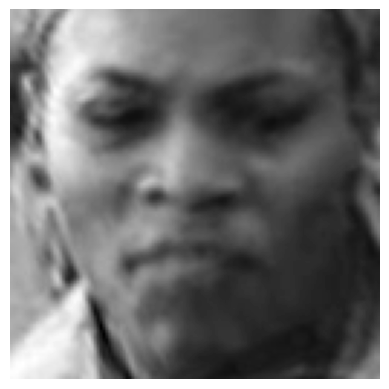

In [ ]:
image_index = 3
print("Original Gender:", gender_dict[y_gender_test[image_index]], "Original Age:", y_age_test[image_index])
# predict from model
pred = model.predict(X_test[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X_test[image_index].reshape(128, 128), cmap='gray');

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict gender and age for X_test
gender_pred, age_pred = model.predict(X_test)

# Convert probabilities to classes
gender_pred_classes = (gender_pred > 0.5).astype(int)  # Assuming 0.5 threshold for gender prediction
age_pred_classes = np.round(age_pred)

# Display confusion matrix and classification report for gender
print("Confusion Matrix for Gender:")
print(confusion_matrix(y_gender_test, gender_pred_classes))
print("\nClassification Report for Gender:")
print(classification_report(y_gender_test, gender_pred_classes))


149/149 [==============================] - 1s 5ms/step
Confusion Matrix for Gender:
[[2124  310]
 [ 233 2075]]

Classification Report for Gender:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2434
           1       0.87      0.90      0.88      2308

    accuracy                           0.89      4742
   macro avg       0.89      0.89      0.89      4742
weighted avg       0.89      0.89      0.89      4742

